# Notebook for making 3Di consensus sequence comparisons between ProstT5 and foldseek


In [1]:
from Bio import SeqIO
import numpy as np
import pandas as pd
from plotnine import ggplot, geom_point, geom_bar, geom_histogram, geom_abline, aes, theme_bw, labs, lims
from typing import List

In [2]:
import os
os.chdir('..')
print(os.getcwdb())
save_plots = False
plot_path = 'out/plots/'

b'/home/mpjw/study/bioinformatics/semesters/2024s/steineggerLab-SNU/consensus3Di'


In [3]:
def hamming_distance(seq1: str, seq2: str) -> int:
    """
    Funciton to compute hamming distance between two DNA strings.
    """
    assert len(seq1) == len(seq1)
    
    # naive approach: count differences
    return len([i for i in range(len(seq1)) if seq1[i] != seq2[i]])

def substitution_distance(seq1: str, seq2: str, sub_mat: pd.DataFrame):
    """
    Function to calculate distance based on substitution matrix.
    """

    assert len(seq1) == len(seq2)

    return sum([sub_mat.loc[aa1][aa2] > 0 for aa1, aa2 in zip(seq1, seq2)]) / len(seq1)

def sequence_identity(seq1: str, seq2: str, method='hamming') -> float:
    """
    Function to calculate sequence identiy.
    """
    assert len(seq1) == len(seq2)

    match method:
        case 'hamming':
            return ( len(seq1) - hamming_distance(seq1, seq2) ) / len(seq1)


In [16]:
# remove .pdb or _pdb from fasta headers to only have the pdb id
def strip_pdb_headers(fasta_in_path, fasta_out_path):
    recs = list(SeqIO.parse(fasta_in_path, 'fasta'))
    for e in recs:
        e.id = e.id.replace('.pdb', '')
        e.id = e.id.replace('_pdb', '')
        e.name = ''
        e.description = ''
    SeqIO.write(recs, fasta_out_path, 'fasta')

## Start sequences

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 25'. Pick better value with 'binwidth'.


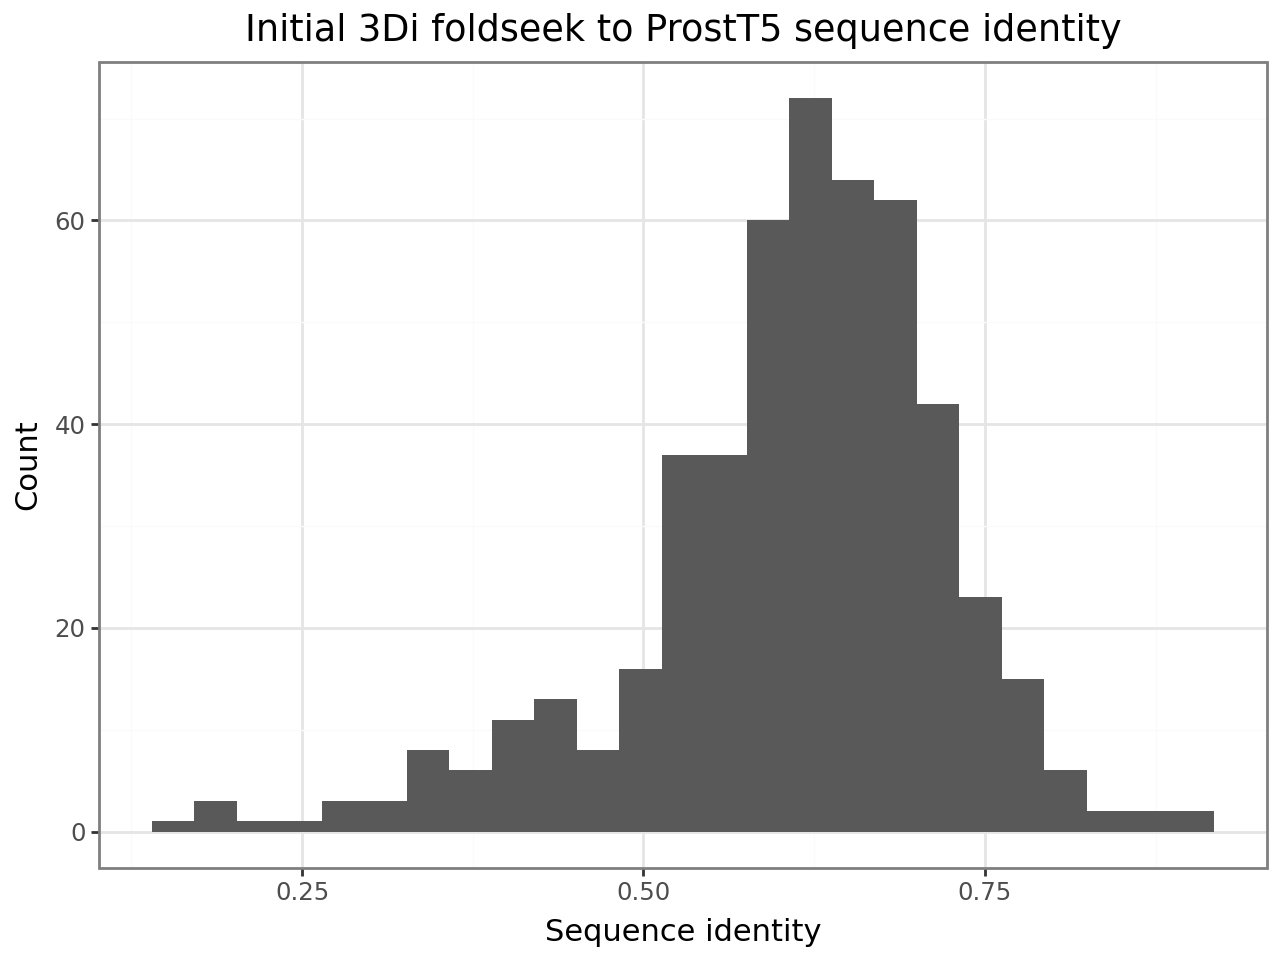

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 15 x 10 in image.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: out/plots/sequence_identity/scope_start_3Di_sequence_identity_hist.png
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 25'. Pick better value with 'binwidth'.


In [6]:
fsk_base_fa = "out/scope/scope.foldseek.3Di.fasta"
pt5_base_fa = "out/scope/scope.prostt5.3Di.fasta"
fsk_base_file = SeqIO.parse(fsk_base_fa,  "fasta")
pt5_base_file = SeqIO.parse(pt5_base_fa, "fasta") 

fsk_base_recs = {e.id.replace('.pdb', ''): e for e in fsk_base_file}
pt5_base_recs = {e.id.replace('.pdb', ''): e for e in pt5_base_file}

base_seq_id = {e.id.replace('.pdb', ''): sequence_identity(e.seq, fsk_base_recs[e.id.replace('.pdb', '')].seq) for _, e in pt5_base_recs.items()}

df_start_seq_id = pd.DataFrame(base_seq_id.items(), columns = ['pdb_id', 'seq_identity'])

df_start_seq_id[['seq_identity']].describe()

plot = (
    ggplot(df_start_seq_id, aes(x='seq_identity')) + 
        geom_histogram() + 
        theme_bw() + 
        labs(title = "Initial 3Di foldseek to ProstT5 sequence identity", x = "Sequence identity", y = "Count")
)
plot.show()

if save_plots:
    plot.save(plot_path + 'sequence_identity/scope_start_3Di_sequence_identity_hist.png', format='png', height=10, width=15)

In [ ]:
# TODO: compare foldseek consensus to foldseek baseline

## ProstT5 encoder only consensus sequences
This section compares the results for predicting consensus 3Di sequences from initial foldseek 3Dis and 3Dis obtained from ProstT5's encoder only on the test data fasta file.


/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 29'. Pick better value with 'binwidth'.


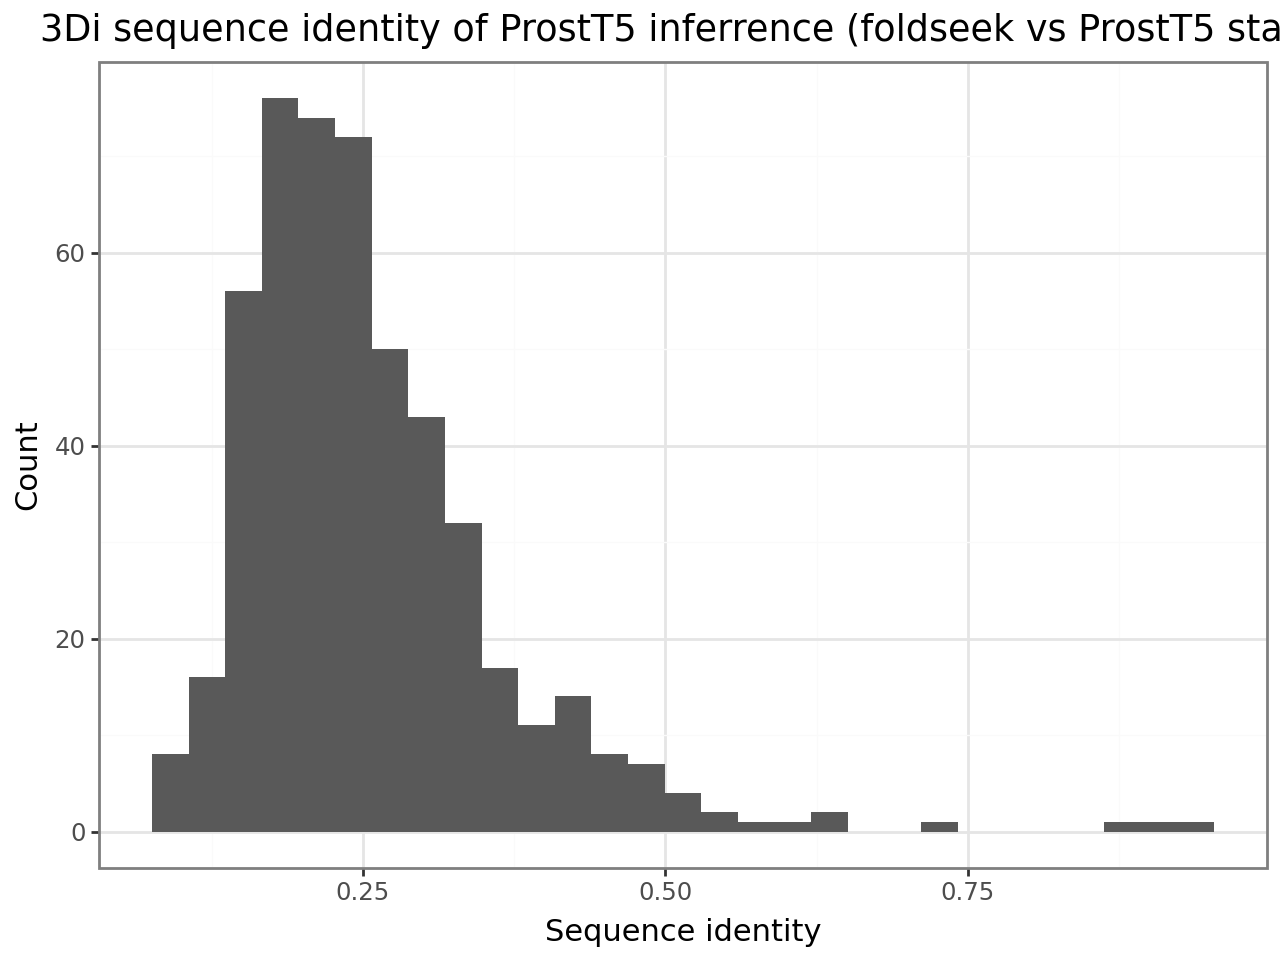

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 15 x 10 in image.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: out/plots/sequence_identity/scope_3Di_sequence_identity_hist.png
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 29'. Pick better value with 'binwidth'.


In [7]:
fsk_fa = "out/scope/foldseek/foldseek3Di.encoderOnlyAA.encoderOnly3Di.fasta"
pt5_fa = "out/scope/prostt5/prostt53Di.encoderOnlyAA.encoderOnly3Di.fasta"
fsk_file = SeqIO.parse(fsk_fa,  "fasta")
pt5_file = SeqIO.parse(pt5_fa, "fasta") 

fold_entries = {e.id.replace('.pdb', ''): e for e in fsk_file}

pt5_id = {e.id.replace('_pdb', ''): sequence_identity(e.seq, fold_entries[e.id.replace('.pdb', '')].seq) for e in pt5_file}

df_seq_id = pd.DataFrame(pt5_id.items(), columns = ['pdb_id', 'seq_identity'])

df_seq_id[['seq_identity']].describe()

plot = (
    ggplot(df_seq_id, aes(x='seq_identity')) + 
        geom_histogram() + 
        theme_bw() + 
        labs(title = "3Di sequence identity of ProstT5 inferrence (foldseek vs ProstT5 start)", x = "Sequence identity", y = "Count")
)
plot.show()

if save_plots:
    plot.save(plot_path + 'sequence_identity/scope_3Di_sequence_identity_hist.png', format='png', height=10, width=15)

## ProstT5 consensus based on foldseek versus foldseek consensus

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 41'. Pick better value with 'binwidth'.


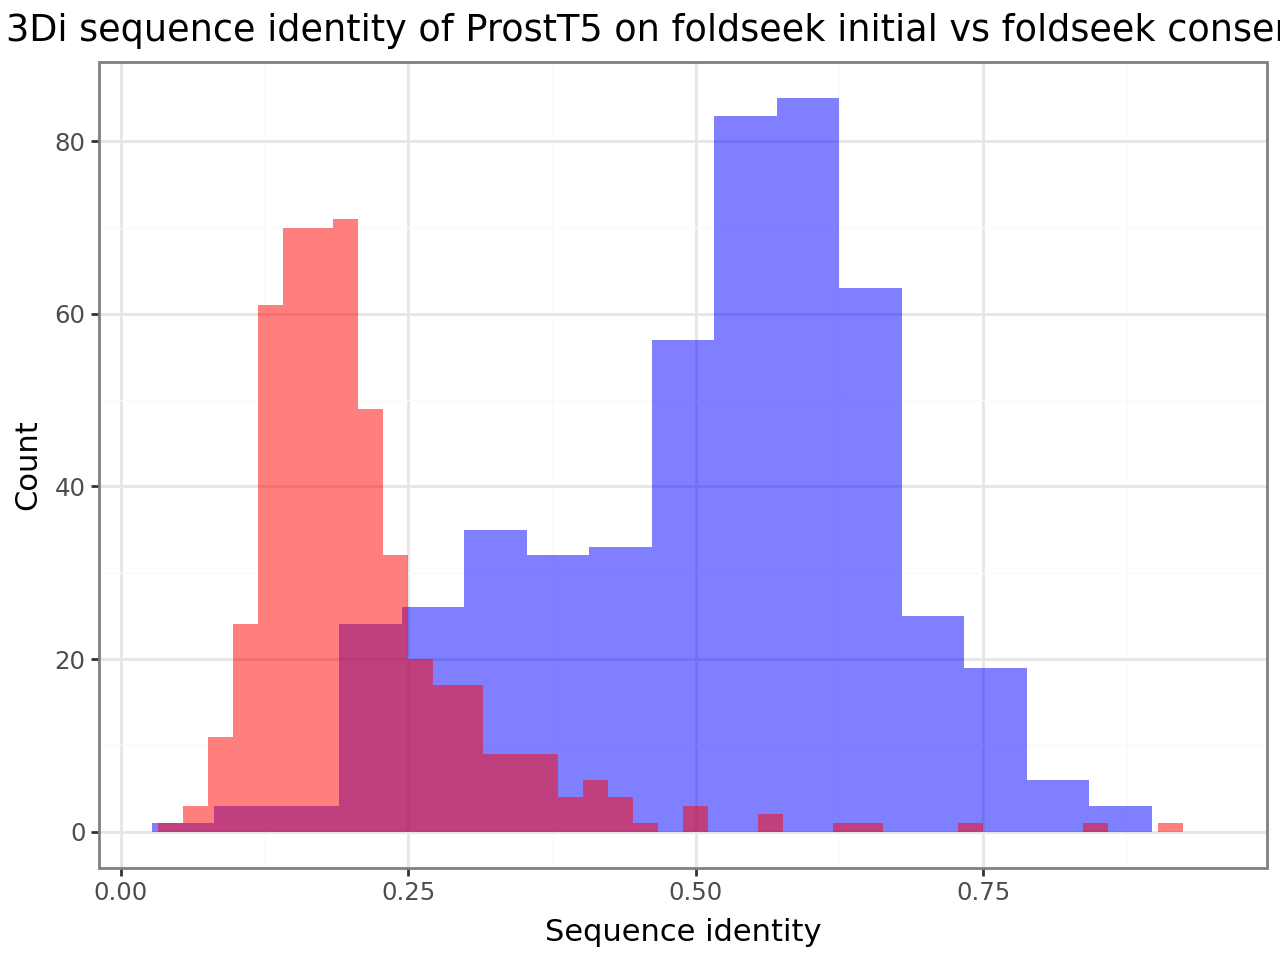

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 15 x 10 in image.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: out/plots/sequence_identity/foldseek_consensus.prostt5_both_baselines.3Di.seq_identity.hist.png
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 41'. Pick better value with 'binwidth'.


In [15]:
fsk_cons_fa = "out/foldseek/foldseek.3Di.consensus.fasta"
fsk_pt5_fa = "out/scope/foldseek/foldseek3Di.encoderOnlyAA.encoderOnly3Di.fasta"
pt5_pt5_fa = "out/scope/prostt5/prostt53Di.encoderOnlyAA.encoderOnly3Di.fasta"

fsk_cons_file = SeqIO.parse(fsk_cons_fa,  "fasta")
fsk_pt5_file = SeqIO.parse(fsk_pt5_fa, "fasta") 
pt5_pt5_file = SeqIO.parse(pt5_pt5_fa, "fasta") 

fsk_cons_recs = {e.id.replace('.pdb', ''): e for e in fsk_cons_file}
fsk_pt5_recs = {e.id.replace('_pdb', ''): e for e in fsk_pt5_file}
pt5_pt5_recs = {e.id.replace('_pdb', ''): e for e in pt5_pt5_file}

key_list = list(fsk_pt5_recs.keys())
cons_id = [(sequence_identity(fsk_pt5_recs[i].seq, fsk_cons_recs[i].seq), sequence_identity(pt5_pt5_recs[i].seq, fsk_cons_recs[i].seq)) for i in key_list]
# cons_id = {i: sequence_identity(fsk_pt5_recs[i].seq, fsk_cons_recs[i].seq) for i in fsk_pt5_recs.keys()}
# cons2_id = {i: sequence_identity(pt5_pt5_recs[i].seq, fsk_cons_recs[i].seq) for i in fsk_pt5_recs.keys()}

df_seq_id = pd.DataFrame(np.array(cons_id, dtype=np.dtype({'names': ['fsk_pt5_seqid', 'pt5_pt5_seqid'], 'formats': ['f4', 'f4']})), index=key_list)


# df_seq_id[['seq_identity']].describe()

plot = (
    ggplot(df_seq_id) + 
        geom_histogram(aes(x='fsk_pt5_seqid'), fill='blue', alpha=0.5) +
        geom_histogram(aes(x='pt5_pt5_seqid'), fill='red', alpha=0.5) + 
        theme_bw() + 
        labs(title = "3Di sequence identity of ProstT5 on foldseek initial vs foldseek consensus", x = "Sequence identity", y = "Count")
)
plot.show()

if save_plots:
    plot.save(plot_path + 'sequence_identity/foldseek_consensus.prostt5_both_baselines.3Di.seq_identity.hist.png', format='png', height=10, width=15)

In [9]:
# preparing a dataframe with sequence identity for different 3Di stings
# key_list = list(fsk_base_recs.keys())
df_seq_id = pd.DataFrame({'pdb_key': key_list, 'base_id': [base_seq_id[i] for i in key_list], 'pt5_id': [pt5_id[i] for i in key_list], 'cons_fsk_id': [i[0] for i in cons_id], 'cons_pt5_id': [i[1] for i in cons_id]})
df_seq_id

,pdb_key,base_id,pt5_id,cons_fsk_id,cons_pt5_id
0,d1y5ia2,0.537244,0.243948,0.234637,0.139665
1,d1p80a2,0.590193,0.294221,0.332750,0.164623
2,d1hk8a_,0.586453,0.197861,0.379679,0.183601
3,d3c98a_,0.627698,0.230216,0.476619,0.165468
4,d1ehka_,0.615809,0.270221,0.316176,0.224265
...,...,...,...,...,...
493,d1pnha_,0.677419,0.258065,0.580645,0.193548
494,d2adra1,0.517241,0.172414,0.482759,0.137931
495,d2j7ja3,0.785714,0.321429,0.464286,0.285714
496,d1e3ha4,0.400000,0.400000,0.280000,0.160000


Now compare the sequence identity of baseline 3Di from foldseek and ProstT5 to the sequence identity of ProstT5 predictions on both baseline sequences (that means the encoder only output for 1. 3Di to AA and afterwards AA to 3Di conversions).

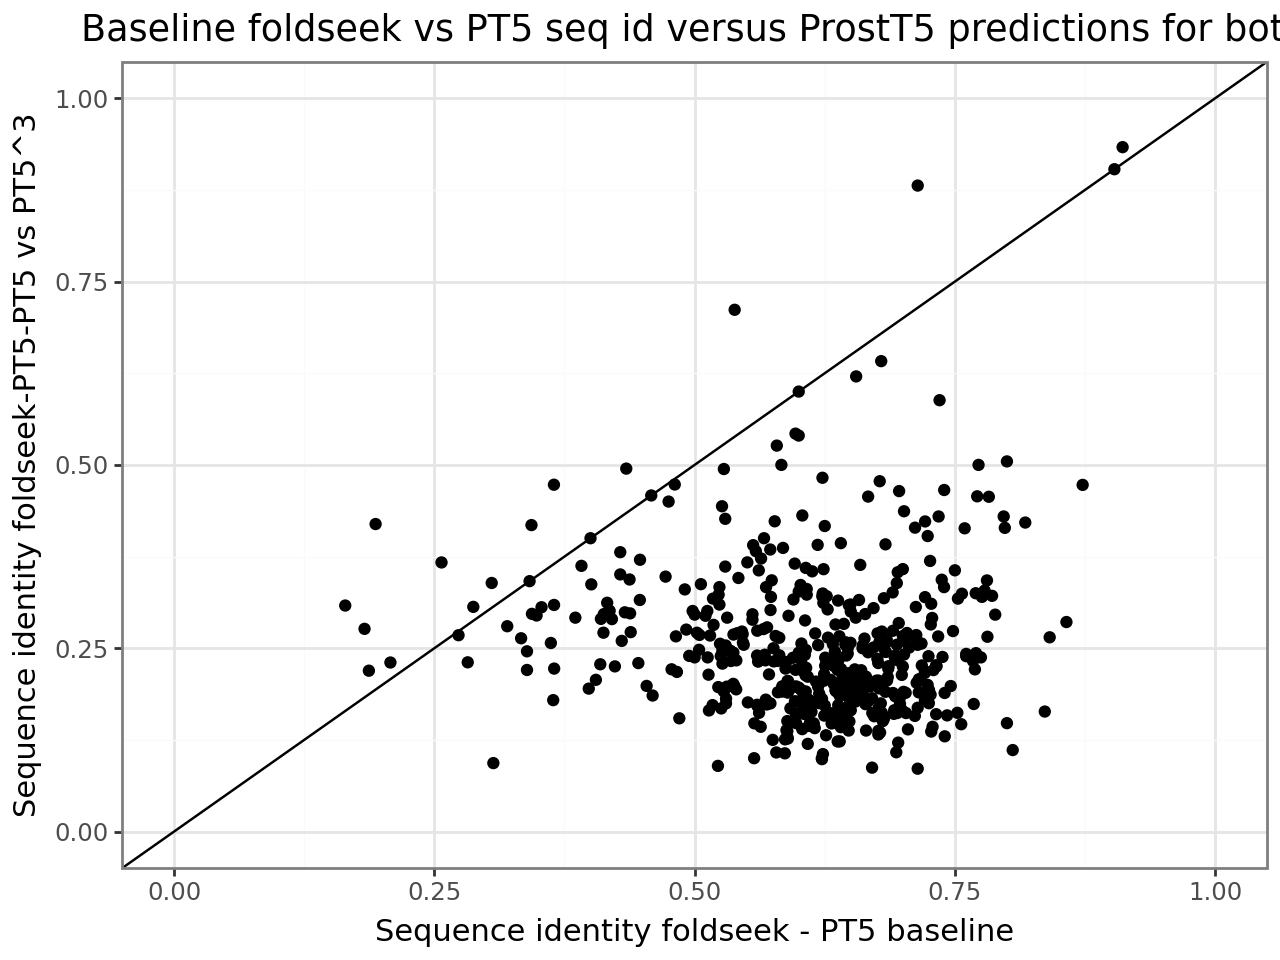

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 15 x 10 in image.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: out/plots/sequence_identity/baseline_fs_pt5_seq_id.pt5_pred_seq_id.point.png


In [10]:
# plot pairwise sequence identity comparisons as scatter plots
plot = (
    ggplot(df_seq_id, aes(x='base_id', y='pt5_id')) + 
        geom_point() + 
        geom_abline(slope=1) +
        theme_bw() + 
        labs(title = "Baseline foldseek vs PT5 seq id versus ProstT5 predictions for both", x = "Sequence identity foldseek - PT5 baseline", y = "Sequence identity foldseek-PT5-PT5 vs PT5^3") +
        lims(x=(0,1), y=(0,1))
)
plot.show()

if save_plots:
    plot.save(plot_path + 'sequence_identity/baseline_fs_pt5_seq_id.pt5_pred_seq_id.point.png', format='png', height=10, width=15)

The next plot compares the sequence identities of baseline 3Di sequences (foldseek db versus ProstT5 encoderOnly 3Di output) with sequence identities of foldseek consensus to ProstT5 profile (that is foldseek baseline - PT5 encoder only to AA - PT5 encoder only to 3Di versus ProstT5 baseline - PT5 encoder only to AA - PT5 encoder only to 3Di)  

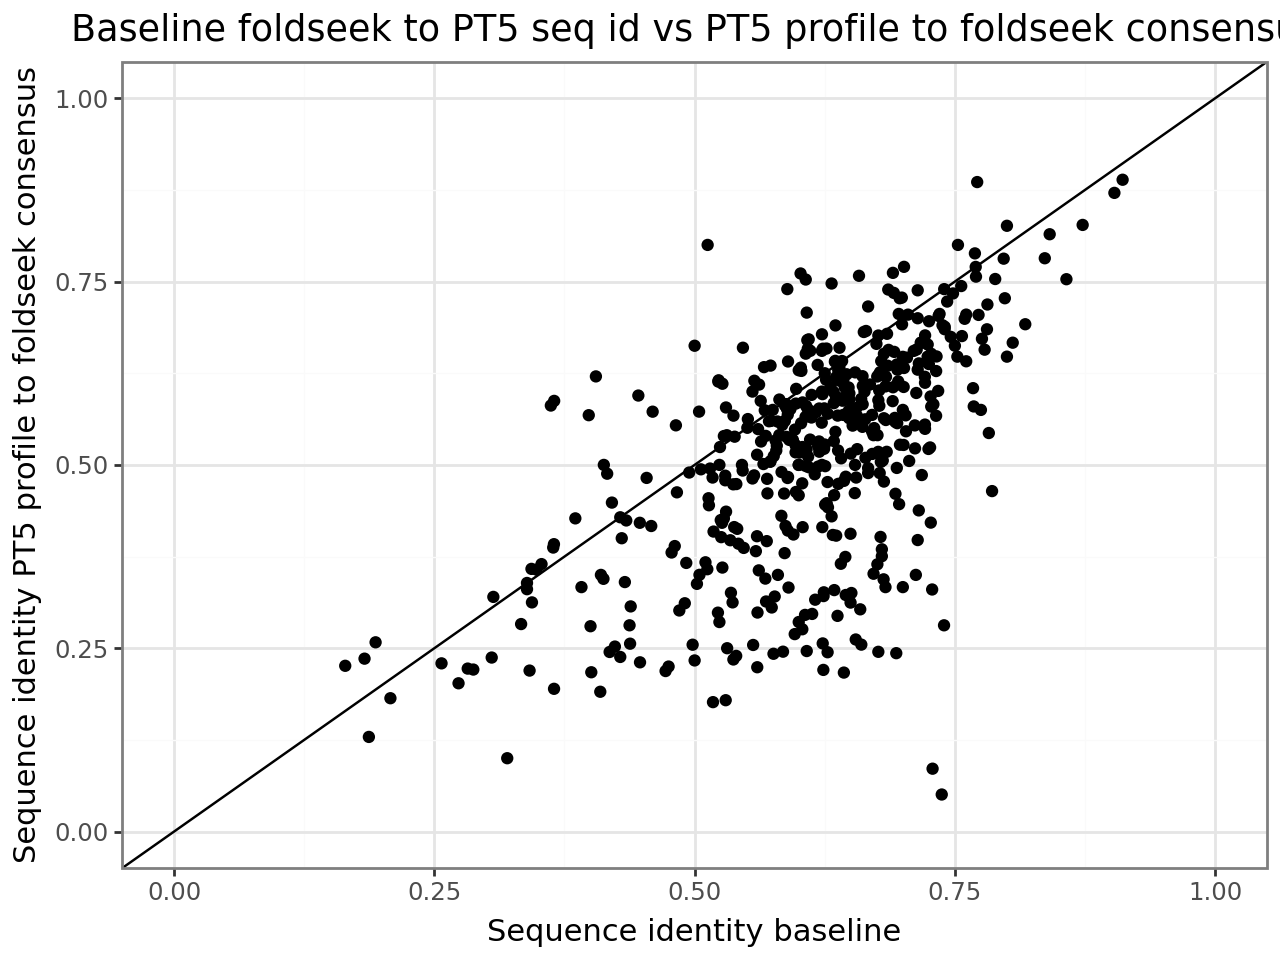

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 15 x 10 in image.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: out/plots/sequence_identity/foldseek_consensus.prostt5.3Di.seq_identity.hist.png


In [11]:
# plot pairwise sequence identity comparisons as scatter plots
plot = (
    ggplot(df_seq_id, aes(x='base_id', y='cons_fsk_id')) + 
        geom_point() + 
        geom_abline(slope=1) +
        theme_bw() + 
        labs(title = "Baseline foldseek to PT5 seq id vs PT5 profile to foldseek consensus", x = "Sequence identity baseline", y = "Sequence identity PT5 profile to foldseek consensus") +
        lims(x=(0,1), y=(0,1))
)
plot.show()

if save_plots:
    plot.save(plot_path + 'sequence_identity/foldseek_consensus.prostt5.3Di.seq_identity.hist.png', format='png', height=10, width=15)

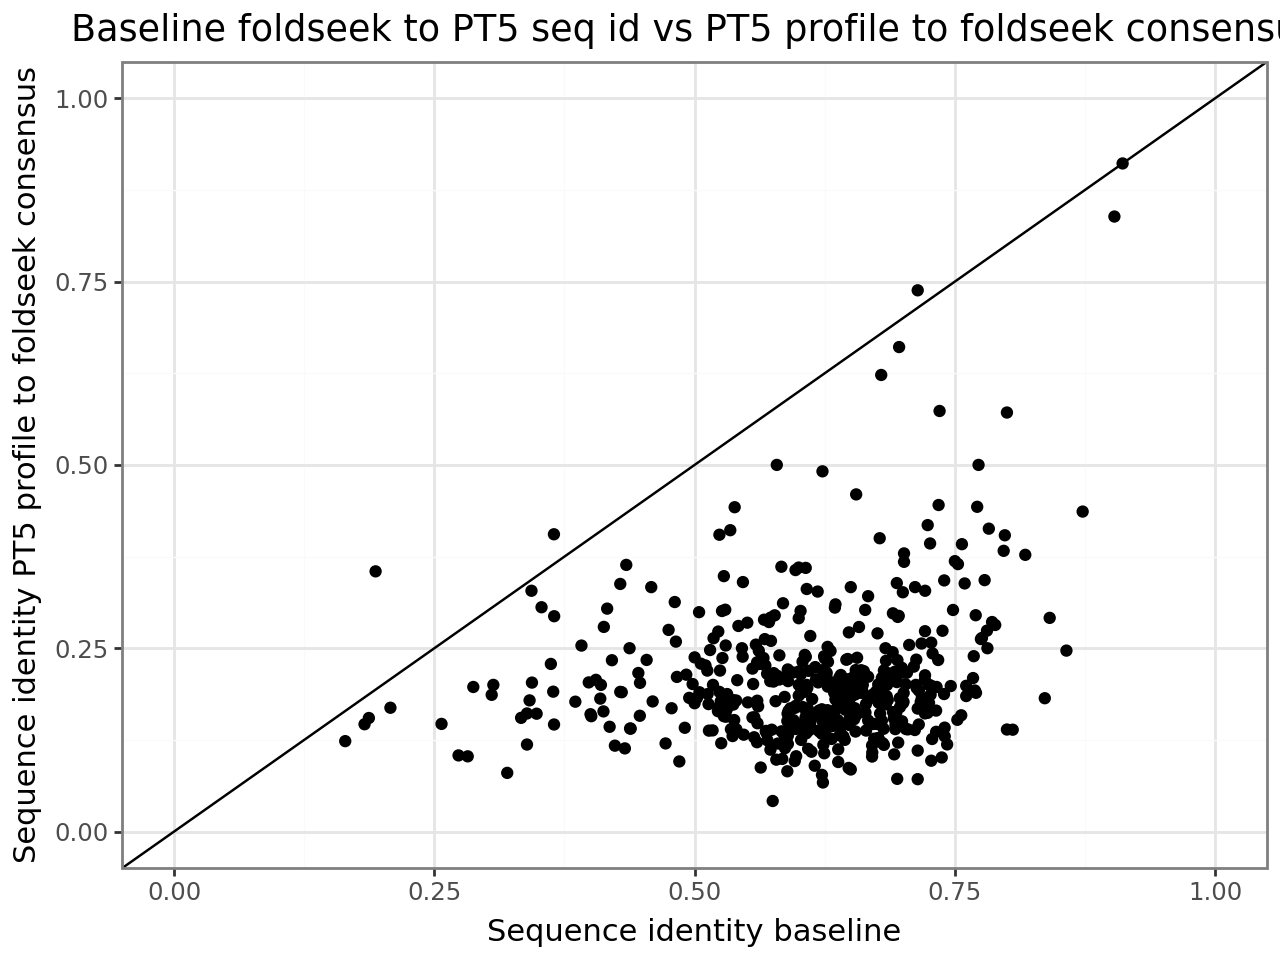

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 15 x 10 in image.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: out/plots/sequence_identity/baseline_seq_ident.fsk_pt5_seq_ident.point.png


In [12]:
# plot pairwise sequence identity comparisons as scatter plots
plot = (
    ggplot(df_seq_id, aes(x='base_id', y='cons_pt5_id')) + 
        geom_point() + 
        geom_abline(slope=1) +
        theme_bw() + 
        labs(title = "Baseline foldseek to PT5 seq id vs PT5 profile to foldseek consensus", x = "Sequence identity baseline", y = "Sequence identity PT5 profile to foldseek consensus") +
        lims(x=(0,1), y=(0,1))
)
plot.show()

if save_plots:
    plot.save(plot_path + 'sequence_identity/baseline_seq_ident.fsk_pt5_seq_ident.point.png', format='png', height=10, width=15)

## Substitution matrix comparison

In [13]:
# loading substitution matrix
sub_mat = "data/mat3di.tsv"
df_sub_mat = pd.read_csv(sub_mat,skiprows=3,index_col=0,delimiter="\t")
df_sub_mat
# df_sub_mat.loc['A']['D']

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,X
A,6,-3,1,2,3,-2,-2,-7,-3,-3,...,-5,-1,1,-4,-7,-5,-6,0,-2,0
C,-3,6,-2,-8,-5,-4,-4,-12,-13,1,...,0,0,1,-1,0,-8,1,-7,-9,0
D,1,-2,4,-3,0,1,1,-3,-5,-4,...,-2,1,-1,-1,-4,-2,-3,-2,-2,0
E,2,-8,-3,9,-2,-7,-4,-12,-10,-7,...,-8,-6,-3,-8,-10,-10,-13,-6,-3,0
F,3,-5,0,-2,7,-3,-3,-5,1,-3,...,-5,-2,2,-5,-8,-3,-7,4,-4,0
G,-2,-4,1,-7,-3,6,3,0,-7,-7,...,-2,-2,-4,3,-3,4,-6,-4,-2,0
H,-2,-4,1,-4,-3,3,6,-4,-7,-6,...,0,-1,-3,1,-3,-1,-5,-5,3,0
I,-7,-12,-3,-12,-5,0,-4,8,-5,-11,...,-7,-6,-6,-3,-9,6,-12,-5,-8,0
K,-3,-13,-5,-10,1,-7,-7,-5,9,-11,...,-12,-6,-5,-9,-14,-5,-15,5,-8,0
L,-3,1,-4,-7,-3,-7,-6,-11,-11,6,...,-3,-2,2,-4,-4,-9,0,-8,-9,0


       subst_dist
count  498.000000
mean     0.697798
std      0.150695
min      0.114286
25%      0.604965
50%      0.741741
75%      0.811464
max      0.953125


/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.


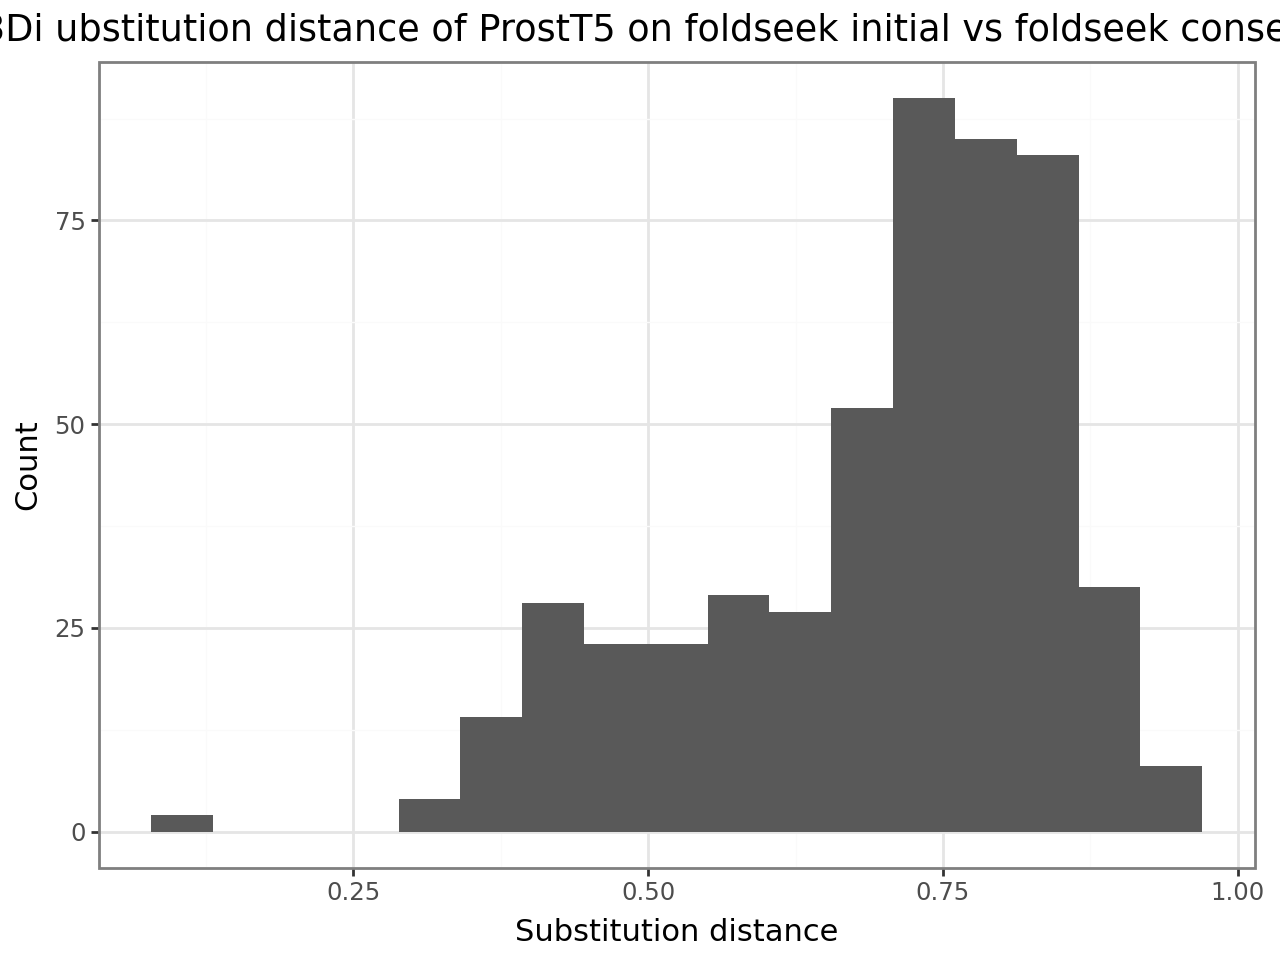

In [31]:
# calculate substitution distance for all consensus foldseek versus prostt5 3Di sequences
fsk_cons_fa = "out/foldseek/foldseek.3Di.consensus.fasta"
pt5_cons_fa = "out/scope/foldseek/foldseek3Di.encoderOnlyAA.encoderOnly3Di.fasta"
fsk_cons_file = SeqIO.parse(fsk_cons_fa,  "fasta")
pt5_cons_file = SeqIO.parse(pt5_cons_fa, "fasta") 

fsk_cons_recs = {e.id.replace('.pdb', ''): e for e in fsk_cons_file}
pt5_cons_recs = {e.id.replace('_pdb', ''): e for e in pt5_cons_file}

seq_id = {e.id: substitution_distance(e.seq, fsk_cons_recs[i].seq, df_sub_mat) for i, e in pt5_cons_recs.items()}

df_seq_id = pd.DataFrame(seq_id.items(), columns = ['pdb_id', 'subst_dist'])

print(df_seq_id[['subst_dist']].describe())

plot = (
    ggplot(df_seq_id, aes(x='subst_dist')) + 
        geom_histogram() + 
        theme_bw() + 
        labs(title = "3Di ubstitution distance of ProstT5 on foldseek initial vs foldseek consensus", x = "Substitution distance", y = "Count")
)

plot.show()
# plot.save('out/foldseek_consensus.foldseek_prostt5.3Di.subst_distance.hist.png', format='png', height=10, width=15)

From foldseek database 3Di file:
```
>d2cbia1.pdb
DPPPVQLVLLVVLVVCLVVVHDCVVSLVVLLVVLVVLLVVLVVCVVDPDVVVCVVCVVLSVLsNLLSQlLNLLSQLVVCLVVVPPVSNVVSLVSNVVSLVVQVPDPHHdDCVGSNVSSVVSNPDDSVVD

DPPPVQLVLLVVLVVCLVVVHDCVVSLVVLLVVLVVLLVVLVVCVVDPDVVVCVVCVVLSVLsNLLSQlLNLLSQLVVCLVVVPPVSNVVSLVSNVVSLVVQVPDPHHdDCVGSNVSSVVSNPDDSVVD

692:DPPPVQLVLLVVLVVCLVVVHDCVVSLVVLLVVLVVLLVVLVVCVVDPDVVVCVVCVVLSVLsNLLSQlLNLLSQLVVCLVVVPPVSNVVSLVSNVVSLVVQVPDPHHdDCVGSNVSSVVSNPDDSVVD
```

## 3Di letter distribution per 3di file


{'D': 11781, 'L': 6169, 'V': 16976, 'Q': 4670, 'C': 3053, 'N': 2389, 'S': 5675, 'P': 6766, 'R': 3017, 'A': 3803, 'K': 1962, 'W': 2097, 'F': 2315, 'T': 1733, 'G': 2867, 'I': 1950, 'H': 3130, 'M': 973, 'E': 1836, 'Y': 1924}
   3Di  count
0    D  11781
1    L   6169
2    V  16976
3    Q   4670
4    C   3053
5    N   2389
6    S   5675
7    P   6766
8    R   3017
9    A   3803
10   K   1962
11   W   2097
12   F   2315
13   T   1733
14   G   2867
15   I   1950
16   H   3130
17   M    973
18   E   1836
19   Y   1924


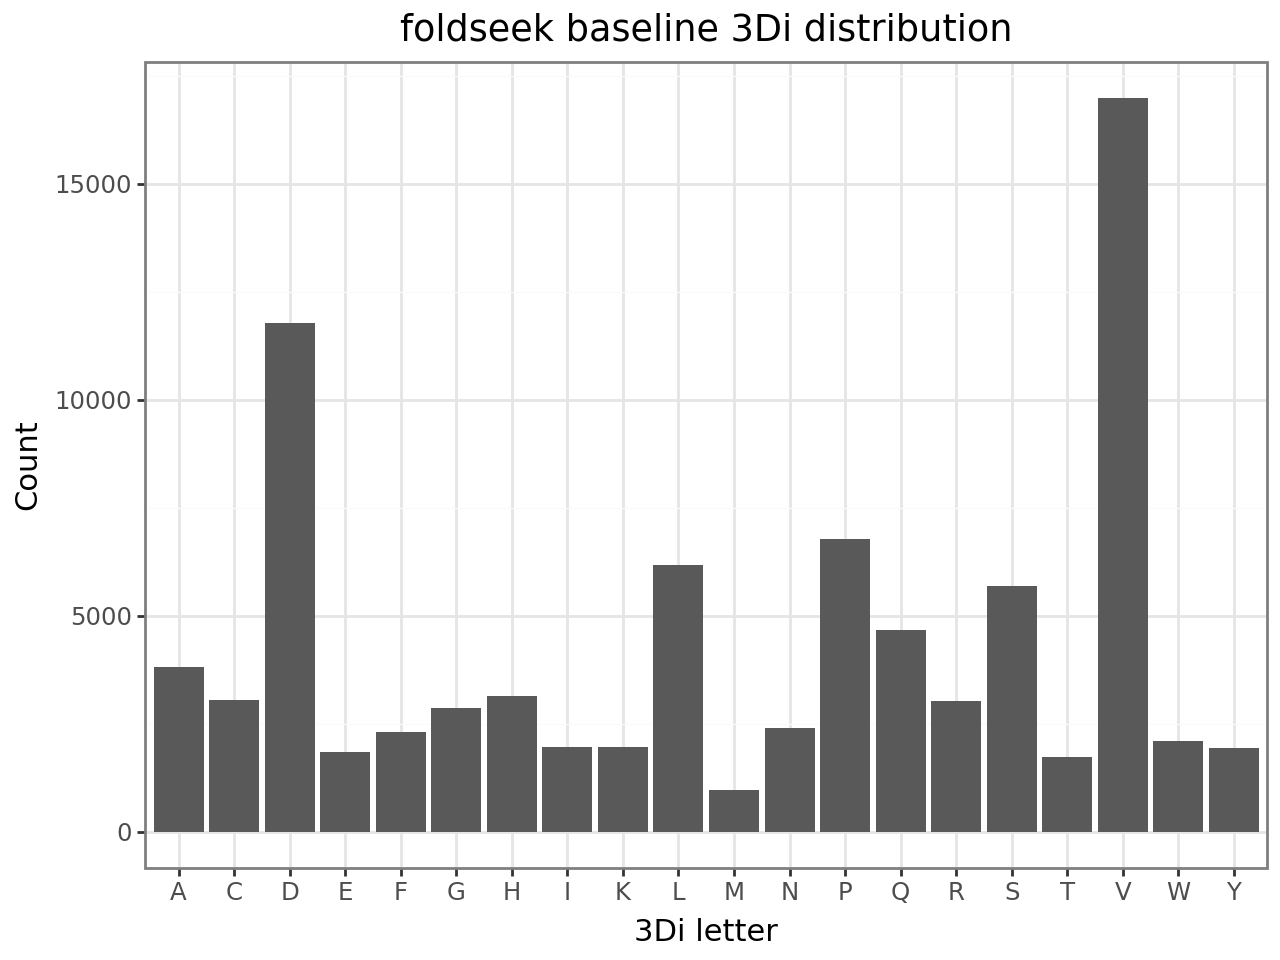

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 15 x 10 in image.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: out/plots/profile3Di/foldseek_baseline.3Di.bar.png


{'D': 18888, 'V': 20735, 'L': 6761, 'P': 6756, 'F': 1643, 'C': 2325, 'Q': 2926, 'A': 2090, 'S': 6255, 'G': 1745, 'R': 1684, 'W': 1755, 'H': 1734, 'T': 1227, 'I': 2002, 'K': 1923, 'N': 1078, 'E': 1417, 'Y': 1442, 'M': 700}
   3Di  count
0    D  18888
1    V  20735
2    L   6761
3    P   6756
4    F   1643
5    C   2325
6    Q   2926
7    A   2090
8    S   6255
9    G   1745
10   R   1684
11   W   1755
12   H   1734
13   T   1227
14   I   2002
15   K   1923
16   N   1078
17   E   1417
18   Y   1442
19   M    700


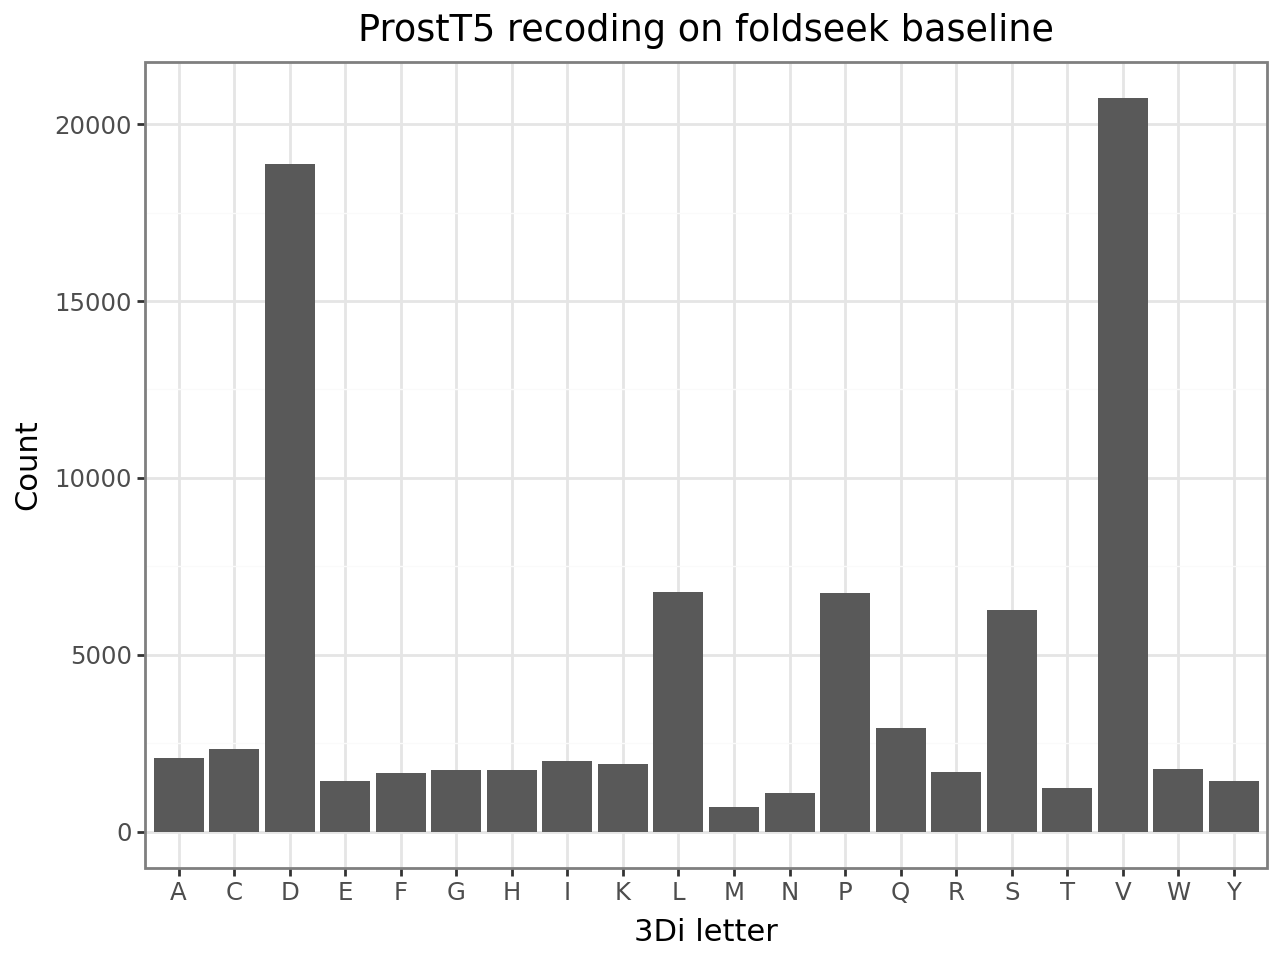

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 15 x 10 in image.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: out/plots/profile3Di/fsk_pt5.3Di.bar.png


{'D': 28823, 'K': 3052, 'P': 10547, 'F': 479, 'W': 1353, 'V': 21475, 'L': 6757, 'N': 190, 'C': 1265, 'S': 5064, 'Q': 808, 'H': 175, 'I': 2020, 'T': 618, 'G': 605, 'M': 968, 'R': 298, 'A': 315, 'E': 129, 'Y': 145}
   3Di  count
0    D  28823
1    K   3052
2    P  10547
3    F    479
4    W   1353
5    V  21475
6    L   6757
7    N    190
8    C   1265
9    S   5064
10   Q    808
11   H    175
12   I   2020
13   T    618
14   G    605
15   M    968
16   R    298
17   A    315
18   E    129
19   Y    145


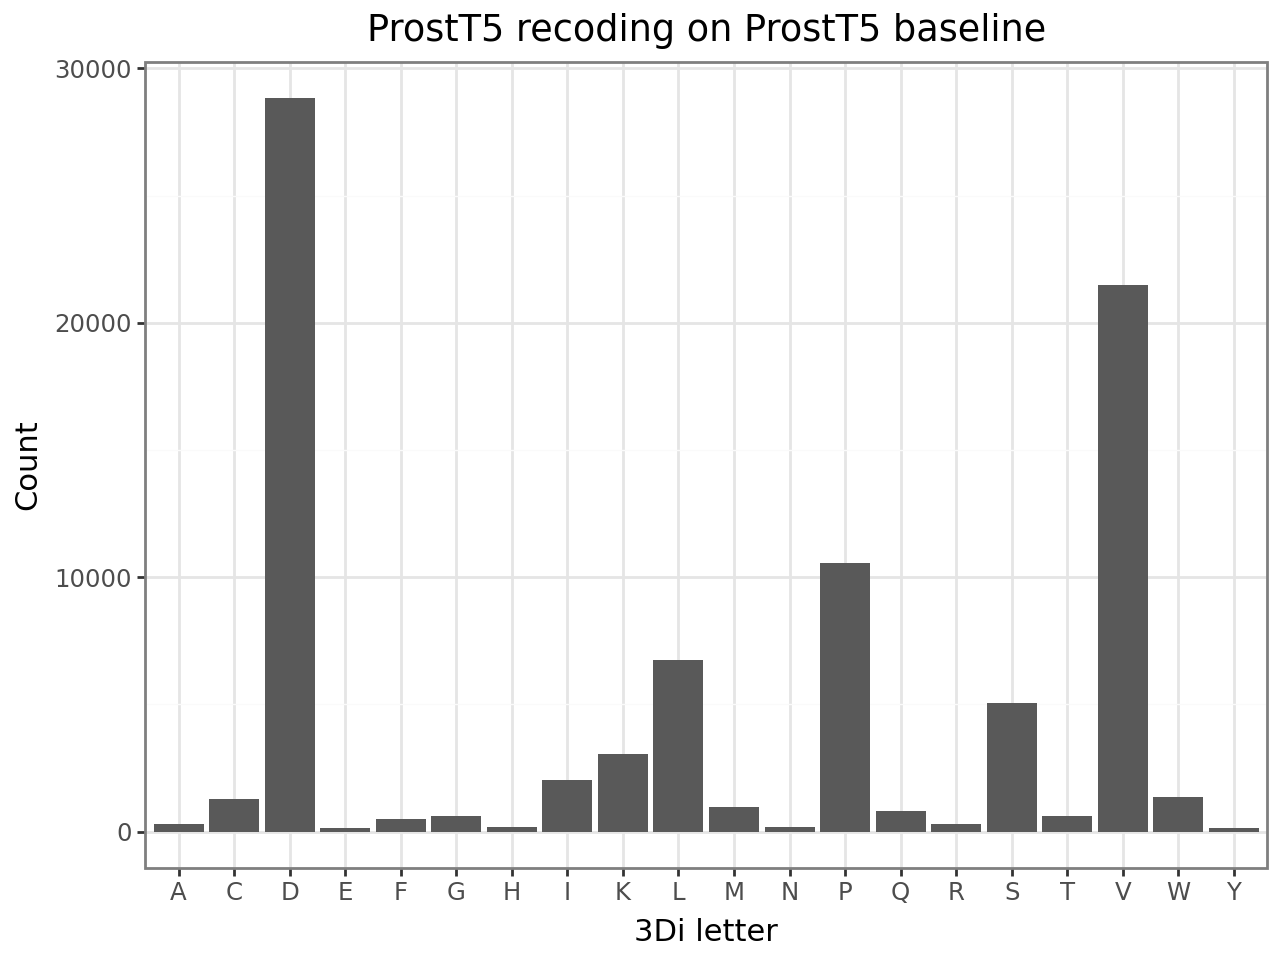

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 15 x 10 in image.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: out/plots/profile3Di/pt5_pt5.3Di.bar.png


{'D': 15581, 'V': 18357, 'L': 7046, 'C': 2474, 'Q': 3733, 'P': 6485, 'R': 2382, 'N': 1692, 'F': 2095, 'W': 1831, 'A': 2742, 'I': 2014, 'T': 1427, 'H': 2170, 'G': 2088, 'S': 6354, 'E': 1806, 'Y': 1770, 'K': 2079, 'M': 960}
   3Di  count
0    D  15581
1    V  18357
2    L   7046
3    C   2474
4    Q   3733
5    P   6485
6    R   2382
7    N   1692
8    F   2095
9    W   1831
10   A   2742
11   I   2014
12   T   1427
13   H   2170
14   G   2088
15   S   6354
16   E   1806
17   Y   1770
18   K   2079
19   M    960


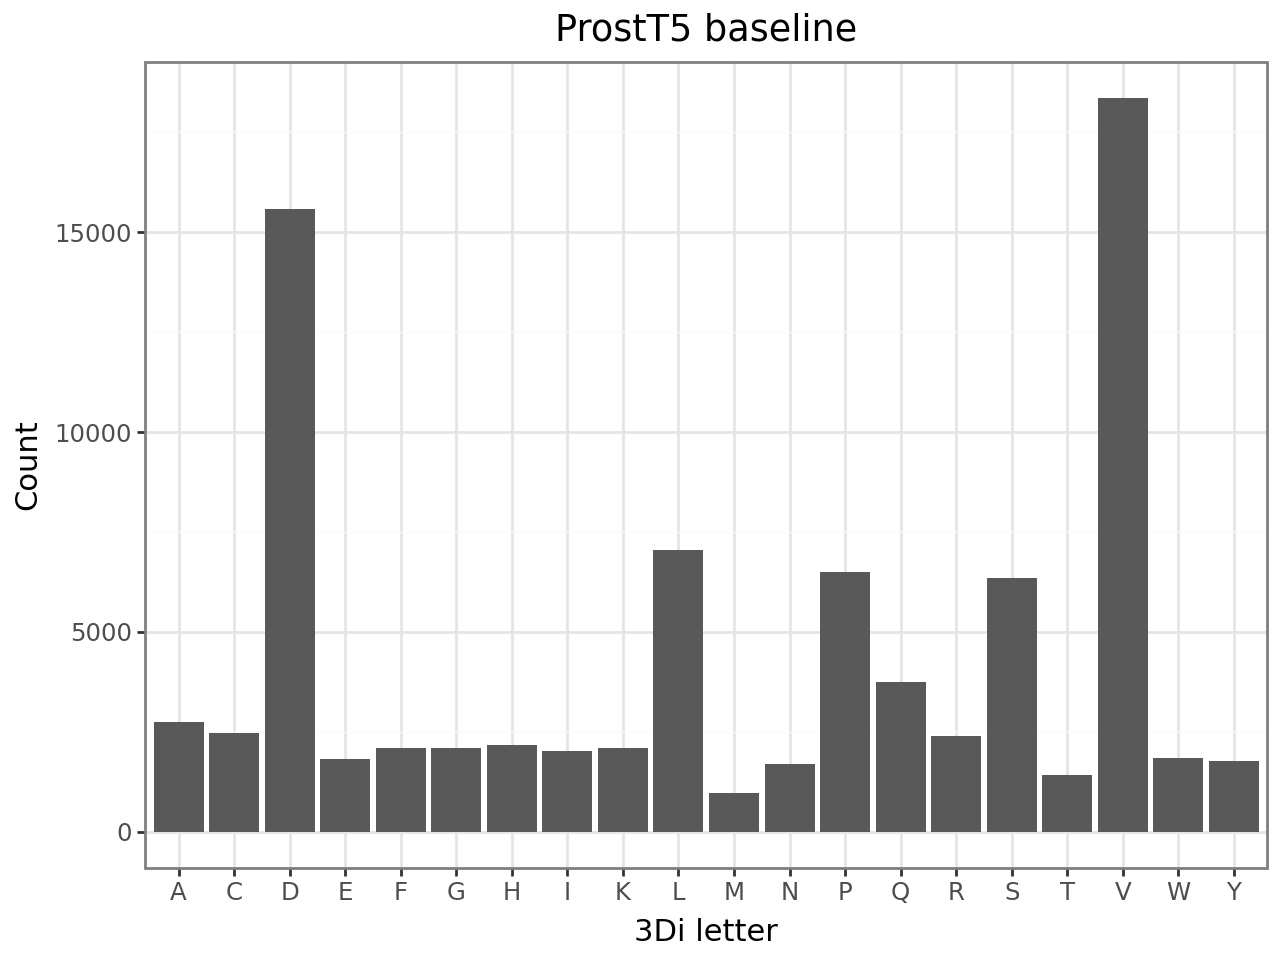

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 15 x 10 in image.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: out/plots/profile3Di/pt5_base.3Di.bar.png


In [14]:
def plot_3Di_distribution(seqIO_records, file_prefix, plot_title=''):
    # tally 3Di letter counts
    count_3Di = dict()
    for _, e in seqIO_records.items():
        for c in e.seq.upper():
            if c not in count_3Di.keys():
                count_3Di[c] = 1
            else:
                count_3Di[c] += 1

    print(count_3Di)

    df_3Di_letters = pd.DataFrame(count_3Di.items(), columns=['3Di', 'count'])
    print(df_3Di_letters)

    plot = (
        ggplot(df_3Di_letters, aes(x='3Di', y='count')) + 
            geom_bar(stat='identity') + 
            theme_bw() + 
            labs(title = plot_title, x = "3Di letter", y = "Count")
    )
    plot.show()

    plot.save(plot_path + 'profile3Di/' + file_prefix + '.3Di.bar.png', format='png', height=10, width=15)

plot_3Di_distribution(fsk_base_recs, file_prefix="foldseek_baseline", plot_title='foldseek baseline 3Di distribution')
plot_3Di_distribution(fsk_pt5_recs, file_prefix='fsk_pt5', plot_title='ProstT5 recoding on foldseek baseline')
plot_3Di_distribution(pt5_pt5_recs, file_prefix="pt5_pt5", plot_title='ProstT5 recoding on ProstT5 baseline')
plot_3Di_distribution(pt5_base_recs, file_prefix="pt5_base", plot_title='ProstT5 baseline')

## Victors substitution matrix comparison

In [33]:
# use https://github.com/Victor-Mihaila/Thesis/blob/master/jac_cpu/identity_visualization.ipynb
def read_substitution_matrix(matrix_str):
    # Split the string into lines
    lines = matrix_str.strip().split("\n")
    
    lines = lines[3:]
    
    # Extract the header (amino acids)
    header = lines[0].split()
    
    # Initialize the substitution matrix dictionary
    subMat = {}
    
    # Process each line after the header
    for line in lines[1:]:
        parts = line.split()
        row_letter = parts[0]
        scores = parts[1:]
        
        # Ensure the row exists in the dictionary
        subMat[row_letter] = {}
        
        # Populate the row with scores
        for col_letter, score in zip(header, scores):
            subMat[row_letter][col_letter] = int(score)
    
    return subMat


def id_percentage(str1, str2):
    if len(str1) != len(str2):
        str1=str1[:min(len(str1),len(str2))]
        str2=str2[:min(len(str1),len(str2))]
    matches = float(sum(c1 == c2 for c1, c2 in zip(str1, str2)))
    
    identity = float((matches / len(str1))) * 100.0

    return identity

with open('data/mat3di.out') as fh:
    content = fh.read()
    subMat = read_substitution_matrix(content)
    

identity_percentage = id_percentage

id=''
fs_seqs={}
lens=[]
with open(fsk_base_fa, 'r') as fs:
    for line in fs:
        if line[0]=='>':
            id=line.strip().replace('.pdb', '')
        else:
            fs_seqs[id]=line.strip()
            lens.append(len(line.strip())) 
           
prostT5_seqs={}
with open(pt5_base_fa, 'r') as pt5:
    for line in pt5:
        if line[0]=='>':
            id=line.strip().replace('.pdb', '')
        else:
            prostT5_seqs[id]=line.strip()
            
fs_profile_seqs={}
with open(fsk_cons_fa, 'r') as prof:
    for line in prof:
        if line[0]=='>':
            id=line.strip().replace('.pdb', '')
        else:
            fs_profile_seqs[id]=line.strip()
            
pt5_profile_seqs={}
with open(pt5_cons_fa, 'r') as prof:
    for line in prof:
        if line[0]=='>':
            id=line.strip().replace('_pdb', '')
        else:
            pt5_profile_seqs[id]=line.strip()
fs_percentage=[]
pt5_percentage=[]

sum_seq=0

for id in fs_seqs:
    fs_percentage.append(id_percentage(fs_seqs[id], fs_profile_seqs[id]))
    pt5_percentage.append(id_percentage(prostT5_seqs[id], pt5_profile_seqs[id]))

size = round(len(fs_percentage), -1)
fs_percentage_sorted=sorted(fs_percentage)
pt5_percentage_sorted=sorted(pt5_percentage)
percentages=[0.1*i for i in range(size)]
cnt1=0
cnt2=0
fs=[]
pt5=[]

for i in range(size):
    while(fs_percentage_sorted[cnt1]<percentages[i]):
        cnt1+=1
    while(pt5_percentage_sorted[cnt2]<percentages[i]):
        cnt2+=1
    fs.append(1-(cnt1/len(fs_percentage_sorted)))
    pt5.append(1-(cnt2/len(pt5_percentage_sorted)))

In [34]:
print(len(fs_percentage_sorted))
print(len(pt5_percentage_sorted))
print(cnt1)
print(cnt2)
print(len(percentages))

498
498
1
84
500


In [35]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 10})
sns.set_style('whitegrid')
fig, axs=plt.subplots(1,3,figsize=(22.5,5))
pt5_better_pt5=[]
pt5_better_fs=[]
fs_better_pt5=[]
fs_better_fs=[]
for i in range(len(fs_percentage)):
    if fs_percentage[i] > pt5_percentage[i]:
        fs_better_pt5.append(pt5_percentage[i])
        fs_better_fs.append(fs_percentage[i])
    elif fs_percentage[i] < pt5_percentage[i] :
        pt5_better_pt5.append(pt5_percentage[i])
        pt5_better_fs.append(fs_percentage[i])
axs[0].scatter(pt5_better_pt5, pt5_better_fs, color='red', marker='x')
axs[0].scatter(fs_better_pt5, fs_better_fs, color='black', marker='x')
axs[0].plot([50,100], [50,100], color='black')
axs[0].set_xlim(left=50)
axs[0].set_ylim(bottom=50)
axs[0].set_title('Indentity % between 3Di sequence and profile')
axs[0].set_xlabel('ProstT5 identity %')
axs[0].set_ylabel('PDB identity %')

axs[1].hist(fs_percentage, bins=30, label='PDB', alpha=0.5, density=True, color='black')
axs[1].hist(pt5_percentage, bins=30, label='ProstT5', alpha=0.5, density=True, color='red')
axs[1].set_title('Density of sequence identity between 3Di sequence and profile')
axs[1].set_ylabel('Density')
axs[1].set_xlabel('Identity %')
#axs[1].legend()

axs[2].plot(fs, percentages, label='PDB', color='black')
axs[2].plot(pt5, percentages, label='ProstT5', color='red')
axs[2].legend()
axs[2].set_ylabel('Identity %')
axs[2].set_xlabel('Sequence coverage')
axs[2].set_title('Percentage of 3Di sequences over identity treshold')

plt.subplots_adjust(wspace=0.3)

fig.savefig("Identity_percentage_visualization.svg", bbox_inches='tight', dpi=500, pad_inches=0.3)